In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

In [ ]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-AI0271EN-SkillsNetwork/labs/v1/m3/data/used_car_price_analysis.csv"
df = pd.read_csv(URL)

# Display basic information
print("Dataset Shape:", df.shape)
print("\n" + "="*50)
print("First few rows:")
print(df.head())
print("\n" + "="*50)
print("Dataset Info:")
print(df.info())
print("\n" + "="*50)
print("Statistical Summary:")
print(df.describe())
print("\n" + "="*50)
print("Column Names:")
print(df.columns.tolist())

Dataset Shape: (17966, 9)

First few rows:
     model  year transmission  mileage fuelType    tax   mpg  engineSize  \
0   Fiesta  2017    Automatic    15944   Petrol  150.0  57.7         1.0   
1    Focus  2018       Manual     9083   Petrol  150.0  57.7         1.0   
2    Focus  2017       Manual    12456   Petrol  150.0  57.7         1.0   
3   Fiesta  2019       Manual    10460   Petrol  145.0  40.3         1.5   
4   Fiesta  2019    Automatic     1482   Petrol  145.0  48.7         1.0   

   price  
0  12000  
1  14000  
2  13000  
3  17500  
4  16500  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   transmission  17966 non-null  object 
 3   mileage       17966 non-null  int64  
 4   fuelType      17966 non-null  object 
 5   tax  

In [ ]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())
print("\n" + "="*50)
print("Missing Values Percentage:")
print((df.isnull().sum() / len(df)) * 100)

# Check for duplicates
print("\n" + "="*50)
print(f"Number of duplicate rows: {df.duplicated().sum()}")

# Remove duplicates
df_clean = df.drop_duplicates()
print(f"Shape after removing duplicates: {df_clean.shape}")

# Handle missing values
# Display missing value details
missing_summary = pd.DataFrame({
    'Column': df_clean.columns,
    'Missing_Count': df_clean.isnull().sum().values,
    'Missing_Percentage': (df_clean.isnull().sum().values / len(df_clean)) * 100
})
print("\n" + "="*50)
print("Missing Value Summary:")
print(missing_summary[missing_summary['Missing_Count'] > 0])

# Strategy for handling missing values
# For numerical columns: fill with median
# For categorical columns: fill with mode

numerical_cols = df_clean.select_dtypes(include=[np.number]).columns
categorical_cols = df_clean.select_dtypes(include=['object']).columns

for col in numerical_cols:
    if df_clean[col].isnull().sum() > 0:
        df_clean[col].fillna(df_clean[col].median(), inplace=True)
        print(f"Filled {col} with median")

for col in categorical_cols:
    if df_clean[col].isnull().sum() > 0:
        df_clean[col].fillna(df_clean[col].mode()[0], inplace=True)
        print(f"Filled {col} with mode")

print("\n" + "="*50)
print(f"Missing values after cleaning: {df_clean.isnull().sum().sum()}")
print(f"Final dataset shape: {df_clean.shape}")

Missing Values:
model           0
year            0
transmission    0
mileage         0
fuelType        0
tax             3
mpg             0
engineSize      0
price           0
dtype: int64

Missing Values Percentage:
model           0.000000
year            0.000000
transmission    0.000000
mileage         0.000000
fuelType        0.000000
tax             0.016698
mpg             0.000000
engineSize      0.000000
price           0.000000
dtype: float64

Number of duplicate rows: 154
Shape after removing duplicates: (17812, 9)

Missing Value Summary:
  Column  Missing_Count  Missing_Percentage
5    tax              3            0.016843
Filled tax with median

Missing values after cleaning: 0
Final dataset shape: (17812, 9)


Sales by Fuel Type:
fuelType
Petrol      12081
Diesel       5706
Hybrid         22
Electric        2
Other           1
Name: count, dtype: int64


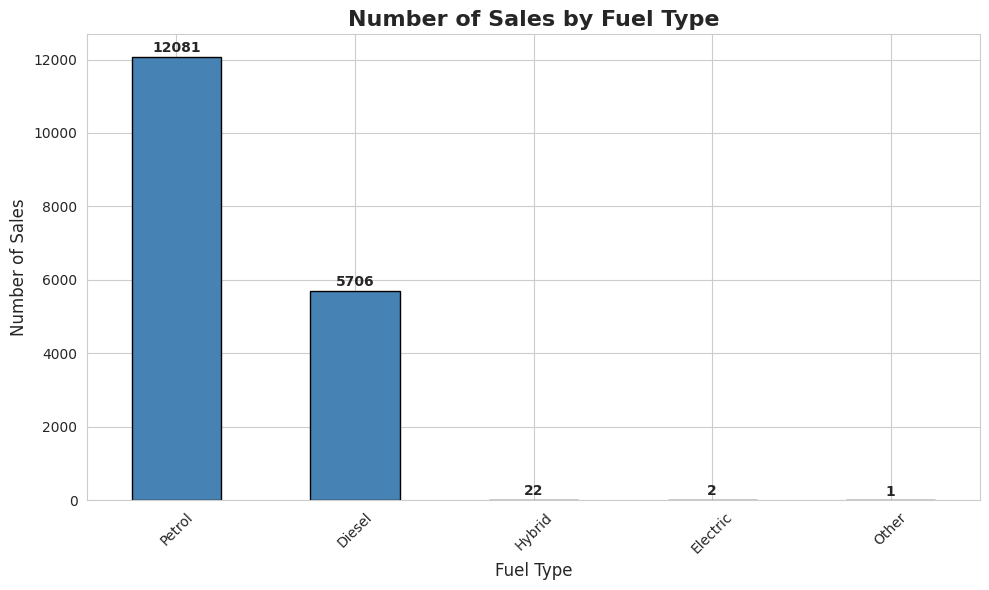

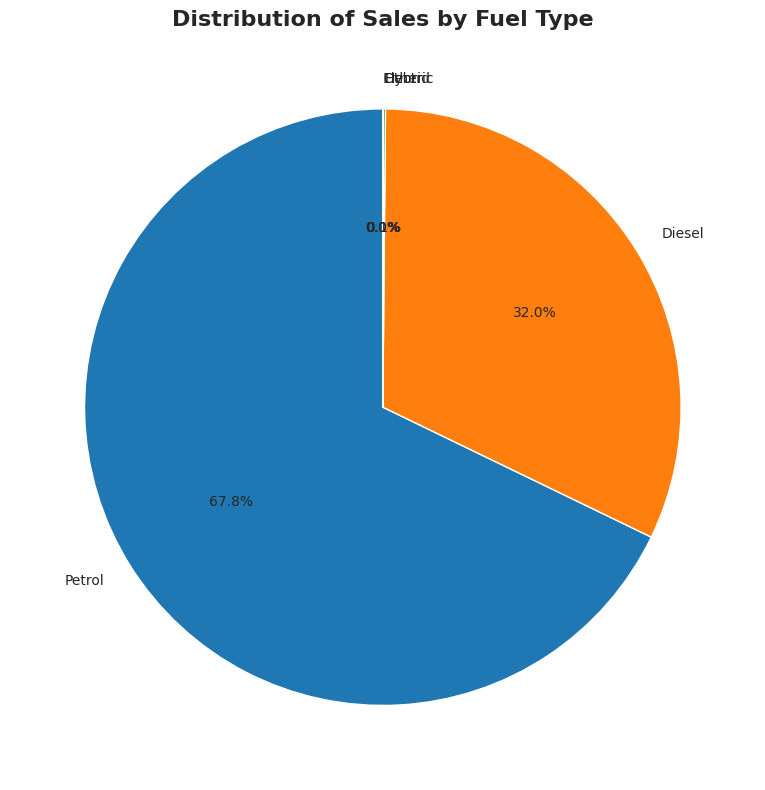

In [ ]:
# Complete the fuel type visualization
fuel_sales = df_clean['fuelType'].value_counts()
print("Sales by Fuel Type:")
print(fuel_sales)
plt.figure(figsize=(10, 6))
ax = fuel_sales.plot(kind='bar', color='steelblue', edgecolor='black')
plt.title('Number of Sales by Fuel Type', fontsize=16, fontweight='bold')
plt.xlabel('Fuel Type', fontsize=12)
plt.ylabel('Number of Sales', fontsize=12)
plt.xticks(rotation=45)
for i, v in enumerate(fuel_sales):
    ax.text(i, v + 50, str(v), ha='center', va='bottom', fontweight='bold')
plt.tight_layout()
plt.show()

# Pie chart for better visualization
plt.figure(figsize=(8, 8))
fuel_sales.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Sales by Fuel Type', fontsize=16, fontweight='bold')
plt.ylabel('')
plt.tight_layout()
plt.show()


PRICE OUTLIERS BY TRANSMISSION TYPE
Columns in dataset: ['model', 'year', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg', 'engineSize', 'price']

Transmission Types: ['Automatic' 'Manual' 'Semi-Auto']

Automatic:
  - Total records: 1354
  - Number of outliers: 44
  - Outlier percentage: 3.25%
  - Price range (non-outlier): $708.62 - $29485.62

Manual:
  - Total records: 15383
  - Number of outliers: 193
  - Outlier percentage: 1.25%
  - Price range (non-outlier): $425.50 - $22997.50

Semi-Auto:
  - Total records: 1075
  - Number of outliers: 41
  - Outlier percentage: 3.81%
  - Price range (non-outlier): $-307.25 - $28518.75


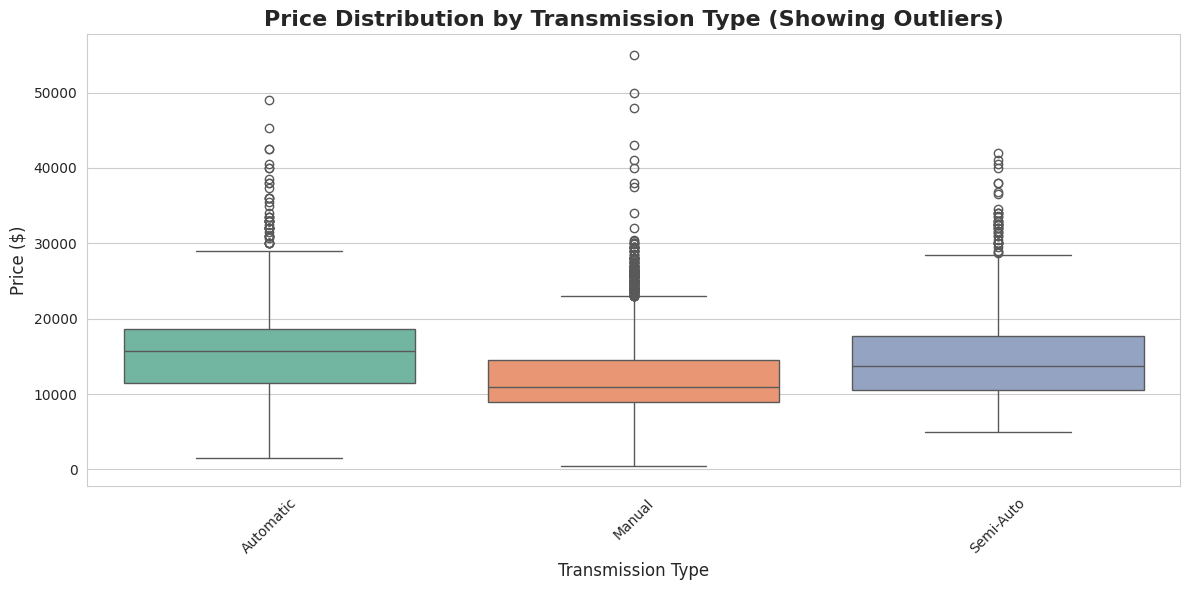

Text(0.5, 1.0, 'Number of Price Outliers by Transmission Type')

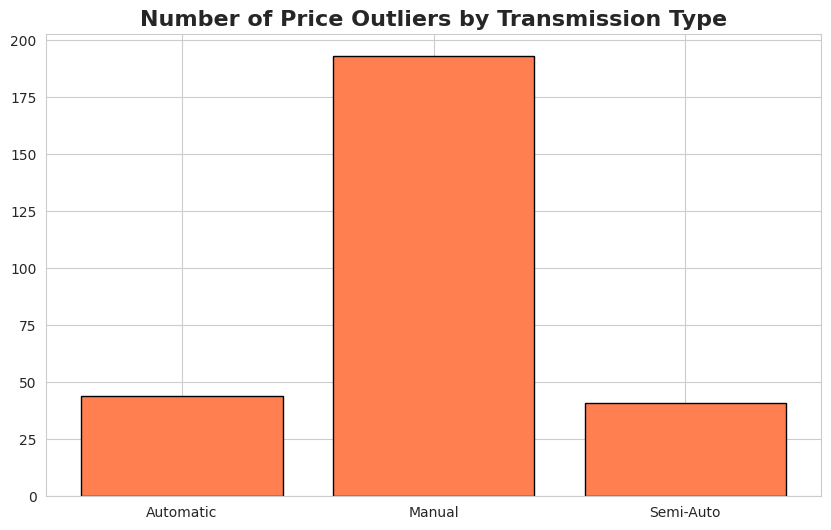

In [ ]:
print("\n" + "="*50)
print("PRICE OUTLIERS BY TRANSMISSION TYPE")
print("="*50)

# Function to detect outliers using IQR method
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Assuming 'price' is the target column and 'transmission' or similar exists
# Check actual column names
print("Columns in dataset:", df_clean.columns.tolist())

# Analyze outliers by transmission type
transmission_types = df_clean['transmissiontype'].unique() if 'transmissiontype' in df_clean.columns else df_clean['transmission'].unique()
print(f"\nTransmission Types: {transmission_types}")

outlier_counts = {}
for trans_type in transmission_types:
    trans_data = df_clean[df_clean['transmissiontype'] == trans_type] if 'transmissiontype' in df_clean.columns else df_clean[df_clean['transmission'] == trans_type]
    outliers, lower, upper = detect_outliers_iqr(trans_data, 'price')
    outlier_counts[trans_type] = len(outliers)
    print(f"\n{trans_type}:")
    print(f"  - Total records: {len(trans_data)}")
    print(f"  - Number of outliers: {len(outliers)}")
    print(f"  - Outlier percentage: {(len(outliers)/len(trans_data)*100):.2f}%")
    print(f"  - Price range (non-outlier): ${lower:.2f} - ${upper:.2f}")

# Visualization - Box plot
plt.figure(figsize=(12, 6))
trans_col = 'transmissiontype' if 'transmissiontype' in df_clean.columns else 'transmission'
sns.boxplot(data=df_clean, x=trans_col, y='price', palette='Set2')
plt.title('Price Distribution by Transmission Type (Showing Outliers)', fontsize=16, fontweight='bold')
plt.xlabel('Transmission Type', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Bar chart of outlier counts
plt.figure(figsize=(10, 6))
plt.bar(outlier_counts.keys(), outlier_counts.values(), color='coral', edgecolor='black')
plt.title('Number of Price Outliers by Transmission Type', fontsize=16, fontweight='bold')


CORRELATION ANALYSIS WITH PRICE
Numerical features: ['year', 'mileage', 'tax', 'mpg', 'engineSize', 'price']

Correlation with Price:
price         1.000000
year          0.635715
engineSize    0.411451
tax           0.405935
mpg          -0.346263
mileage      -0.530483
Name: price, dtype: float64


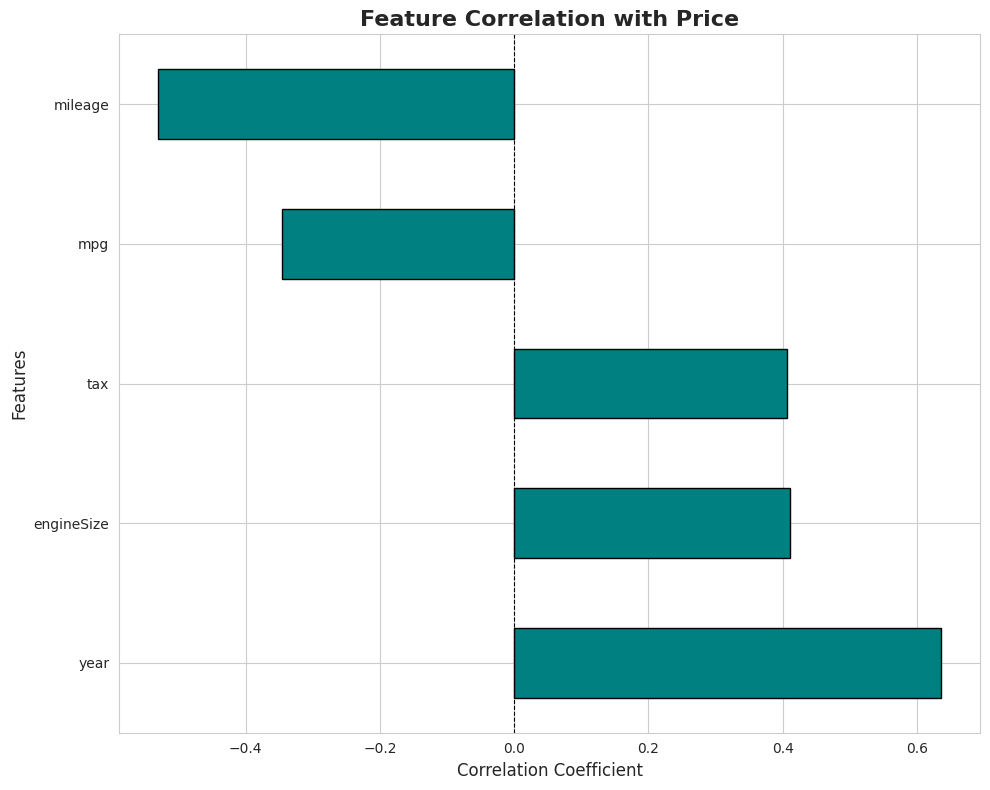

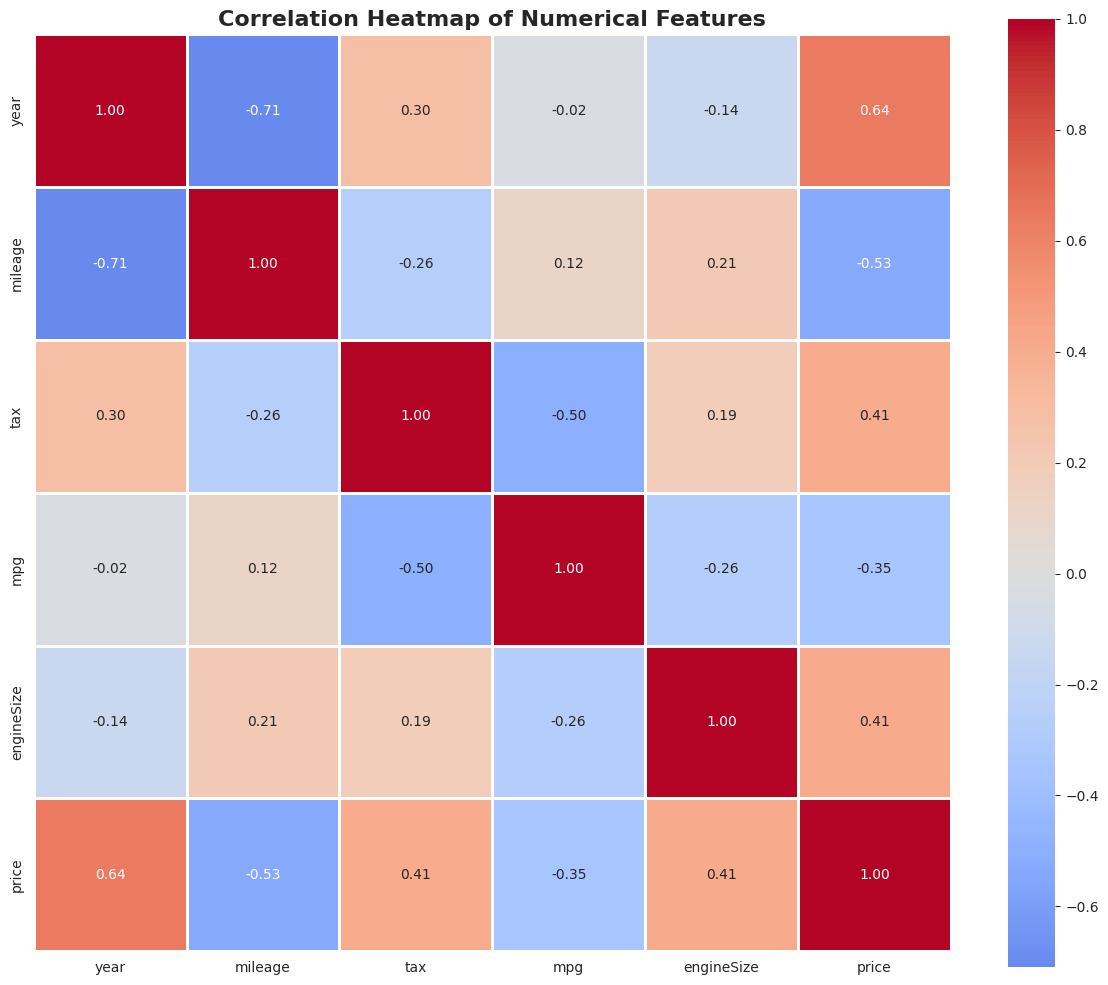

In [ ]:
print("\n" + "="*50)
print("CORRELATION ANALYSIS WITH PRICE")
print("="*50)

# Select numerical features
numerical_features = df_clean.select_dtypes(include=[np.number]).columns.tolist()
print("Numerical features:", numerical_features)

# Calculate correlation with price
if 'price' in df_clean.columns:
    correlations = df_clean[numerical_features].corr()['price'].sort_values(ascending=False)
    print("\nCorrelation with Price:")
    print(correlations)

    # Visualization
    plt.figure(figsize=(10, 8))
    correlations.drop('price').plot(kind='barh', color='teal', edgecolor='black')
    plt.title('Feature Correlation with Price', fontsize=16, fontweight='bold')
    plt.xlabel('Correlation Coefficient', fontsize=12)
    plt.ylabel('Features', fontsize=12)
    plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
    plt.tight_layout()
    plt.show()

# Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df_clean[numerical_features].corr(), annot=True, cmap='coolwarm', center=0,
            fmt='.2f', linewidths=1, square=True)
plt.title('Correlation Heatmap of Numerical Features', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


PREPARING DATA FOR REGRESSION MODELS

Best single feature for regression : 'year'
Correlation with price             :  0.6357

Features used for multi-variable models:
['year', 'mileage', 'tax', 'mpg', 'engineSize', 'transmission_Manual', 'transmission_Semi-Auto', 'fuelType_Electric', 'fuelType_Hybrid', 'fuelType_Other', 'fuelType_Petrol']

Single variable -> Train: (14249, 1) | Test: (3563, 1)
Multi variable  -> Train: (14249, 11) | Test: (3563, 11)

Data standardization complete.

SINGLE VARIABLE REGRESSION MODELS
Feature: 'year'

1. Linear Regression (Single Variable)
--------------------------------------------------
R² Score: 0.3437
RMSE    : 3836.18
MAE     : 2736.25

2. Polynomial Regression Degree 2 (Single Variable)
--------------------------------------------------
R² Score: -0.5093
RMSE    : 5817.40
MAE     : 2633.67

3. Polynomial Regression Degree 3 (Single Variable)
--------------------------------------------------
R² Score: -10.0656
RMSE    : 15751.99
MAE     : 2781.7

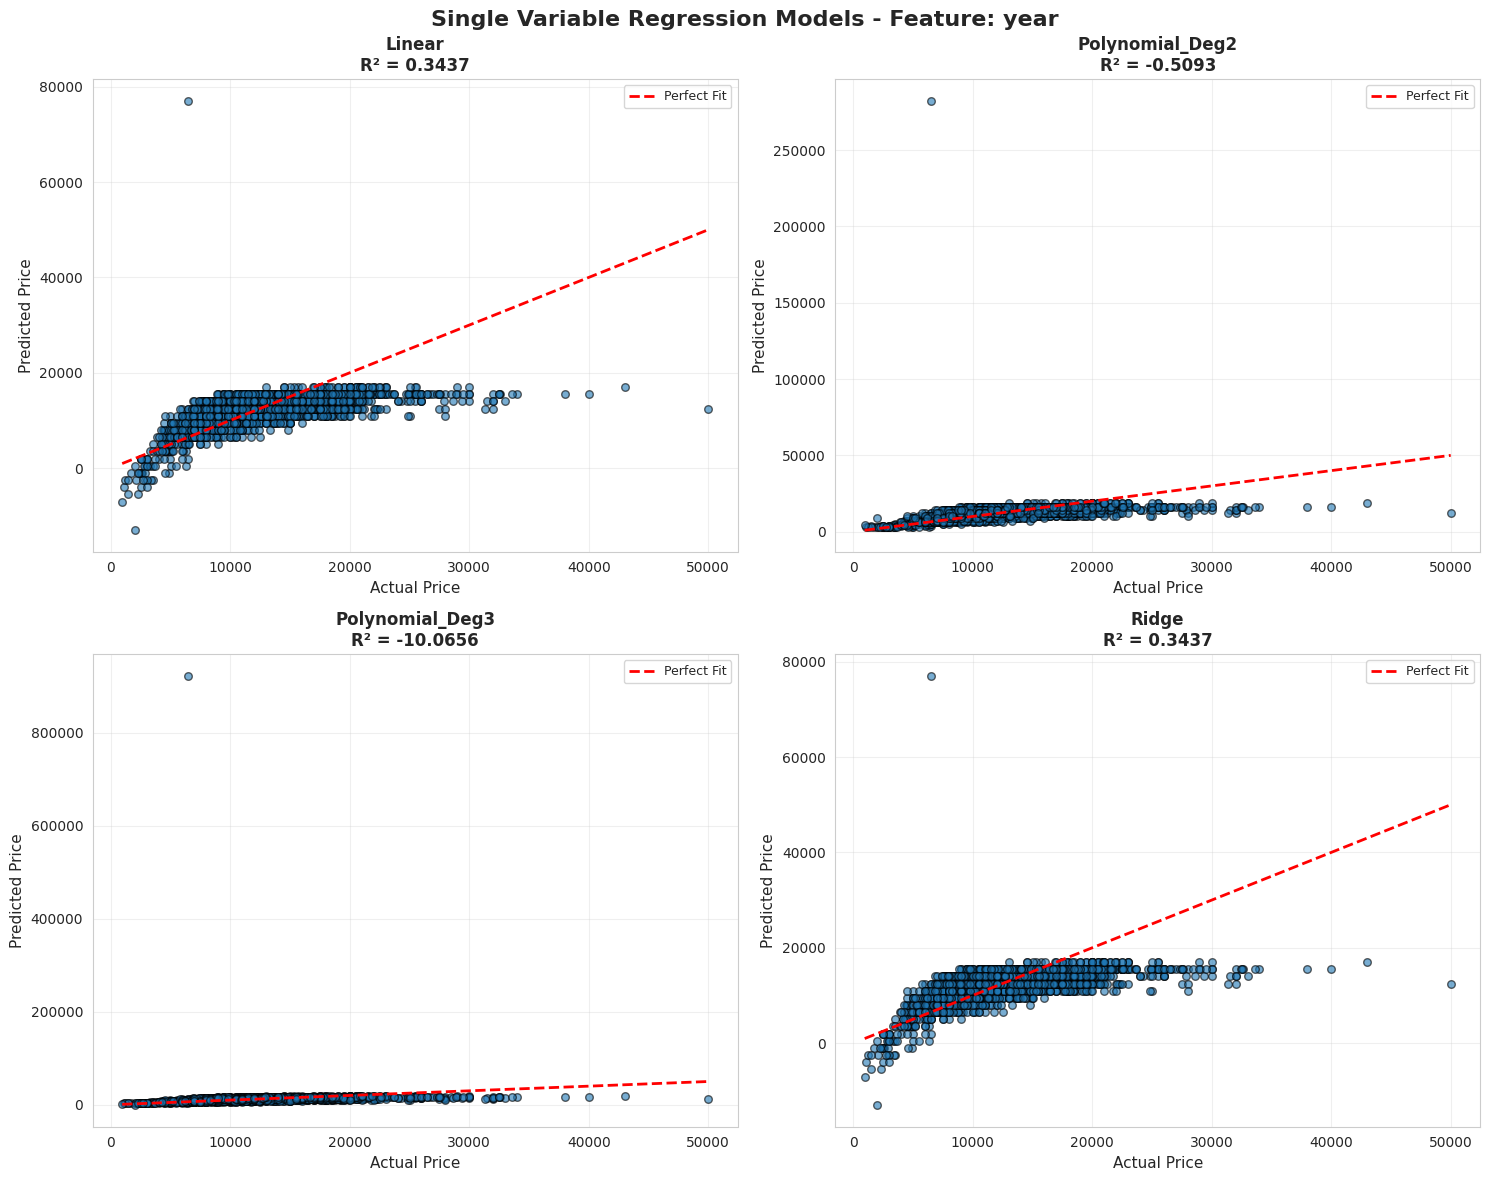


MULTI VARIABLE REGRESSION MODELS

1. Linear Regression (Multi Variable)
--------------------------------------------------
R² Score: 0.7079
RMSE    : 2559.04
MAE     : 1754.03

2. Polynomial Regression Degree 2 (Multi Variable)
--------------------------------------------------
R² Score: 0.3520
RMSE    : 3811.71
MAE     : 1510.99

3. Ridge Regression (Multi Variable)
--------------------------------------------------
R² Score: 0.7080
RMSE    : 2558.99
MAE     : 1754.02

MULTI VARIABLE REGRESSION - SUMMARY TABLE
                       R2         RMSE          MAE
Linear           0.707949  2559.037919  1754.026807
Polynomial_Deg2  0.352046  3811.705639  1510.993566
Ridge            0.707959   2558.99354  1754.015458


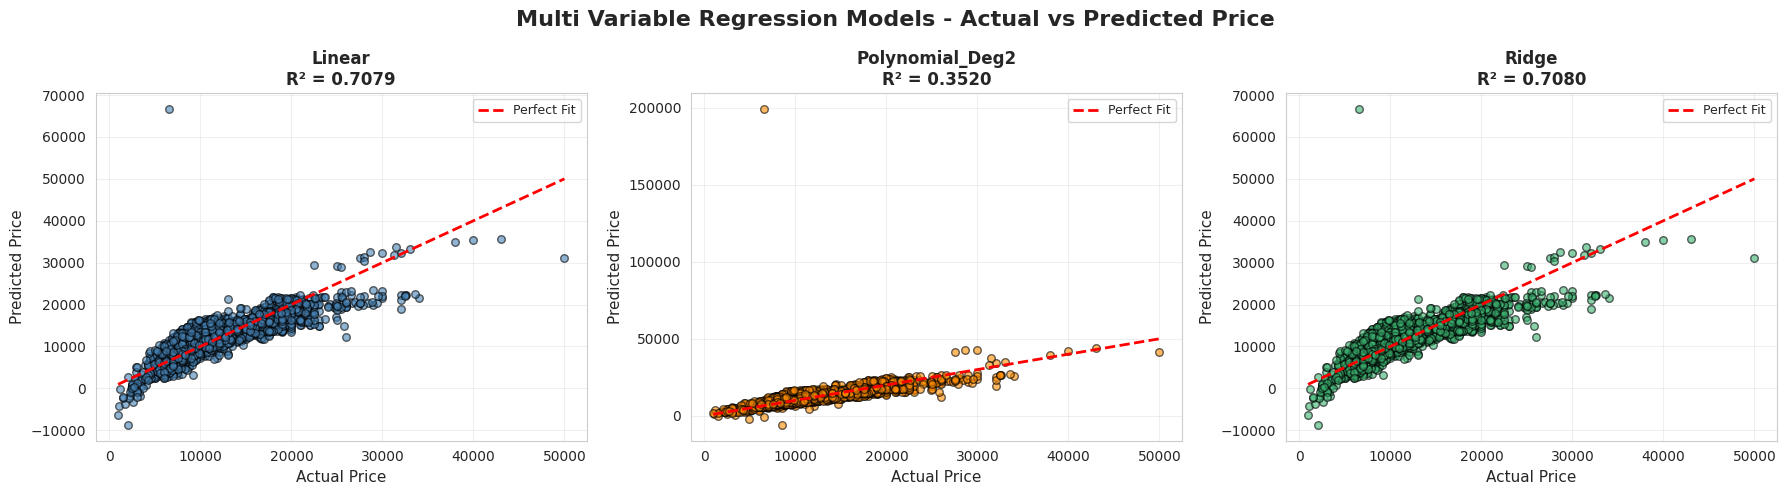


FULL MODEL COMPARISON - SINGLE vs MULTI VARIABLE

All Models Ranked by R² Score:
                           R2          RMSE          MAE
Ridge (Multi)        0.707959   2558.993540  1754.015458
Linear (Multi)       0.707949   2559.037919  1754.026807
Poly Deg2 (Multi)    0.352046   3811.705639  1510.993566
Ridge (Single)       0.343704   3836.164347  2736.252258
Linear (Single)      0.343697   3836.184600  2736.249489
Poly Deg2 (Single)  -0.509256   5817.399100  2633.665251
Poly Deg3 (Single) -10.065625  15751.986788  2781.743350

Best Performing Model : Ridge (Multi)
R² Score              : 0.7080
RMSE                  : 2558.99
MAE                   : 1754.02


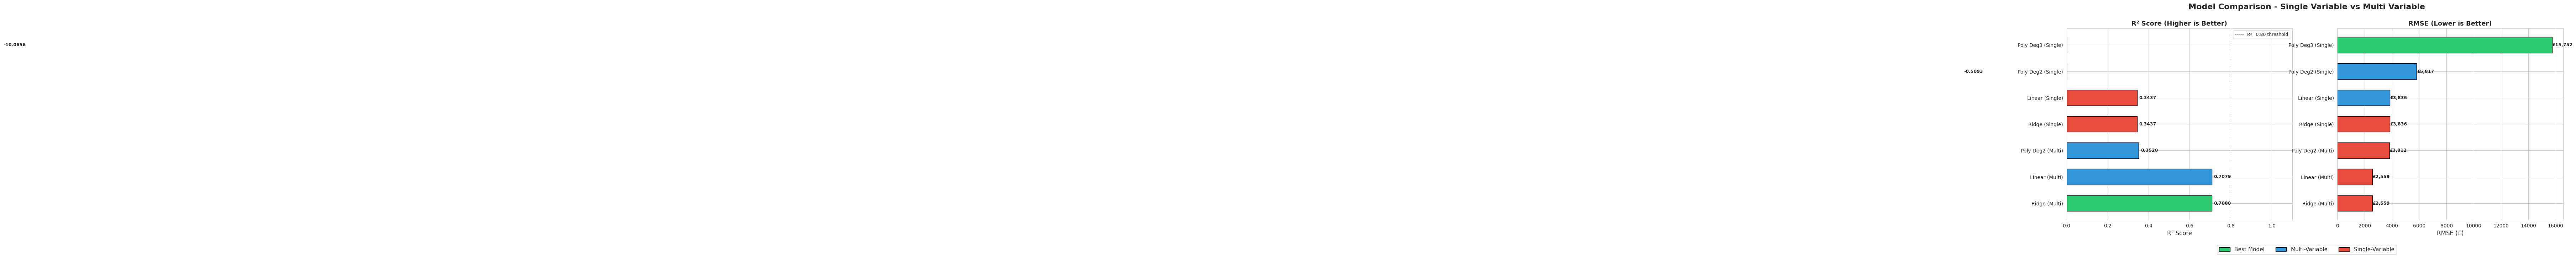


GRID SEARCH - RIDGE REGRESSION
Finding Optimum Hyperparameter (Alpha)

Alpha values to test: [0.001, 0.01, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000]
Cross-validation    : 5-Fold
Scoring metric      : R²

Fitting 5 folds for each of 11 candidates, totalling 55 fits

Best Alpha (Optimum Hyperparameter) : 10
Best Cross-Validation R²            : 0.7458

Test Set Performance (Ridge with Best Alpha=10):
R² Score: 0.7080
RMSE    : 2558.60
MAE     : 1753.91

GRID SEARCH CV RESULTS TABLE
   Alpha  Train R²   Val R²  Val Std  Rank
   0.001  0.747200 0.745789 0.009699     7
   0.010  0.747200 0.745789 0.009699     6
   0.100  0.747200 0.745789 0.009699     5
   0.500  0.747200 0.745789 0.009699     4
   1.000  0.747200 0.745790 0.009698     3
   5.000  0.747200 0.745790 0.009694     2
  10.000  0.747199 0.745791 0.009689     1
  50.000  0.747187 0.745784 0.009650     8
 100.000  0.747148 0.745754 0.009601     9
 500.000  0.746070 0.744739 0.009223    10
1000.000  0.743332 0.742070 0.008800    11


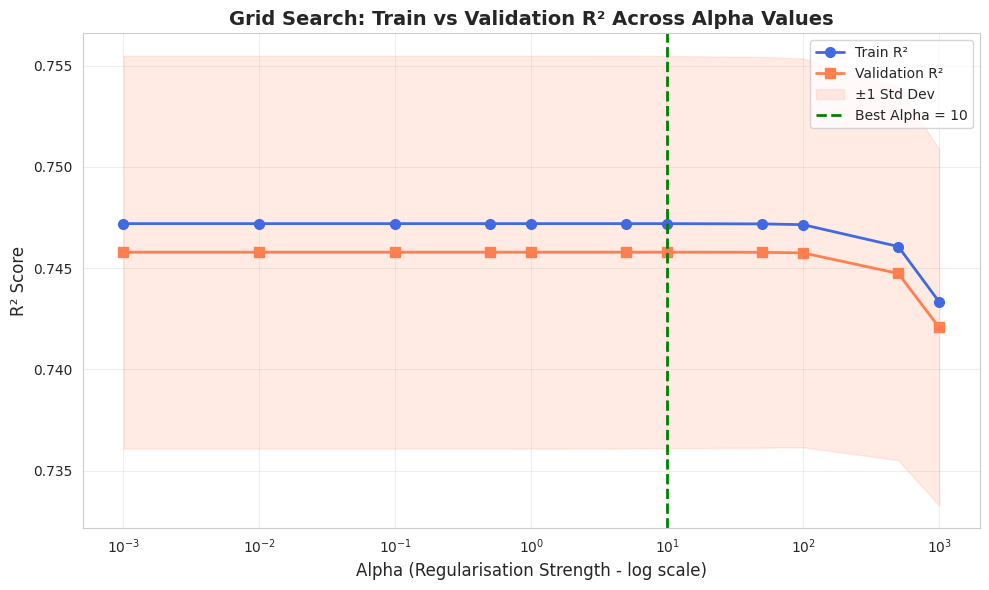

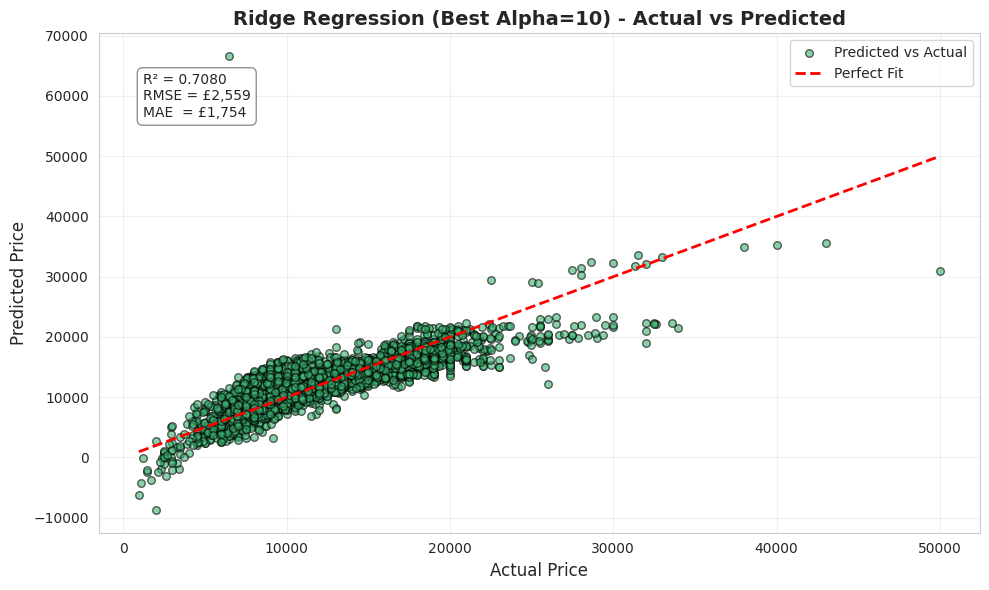

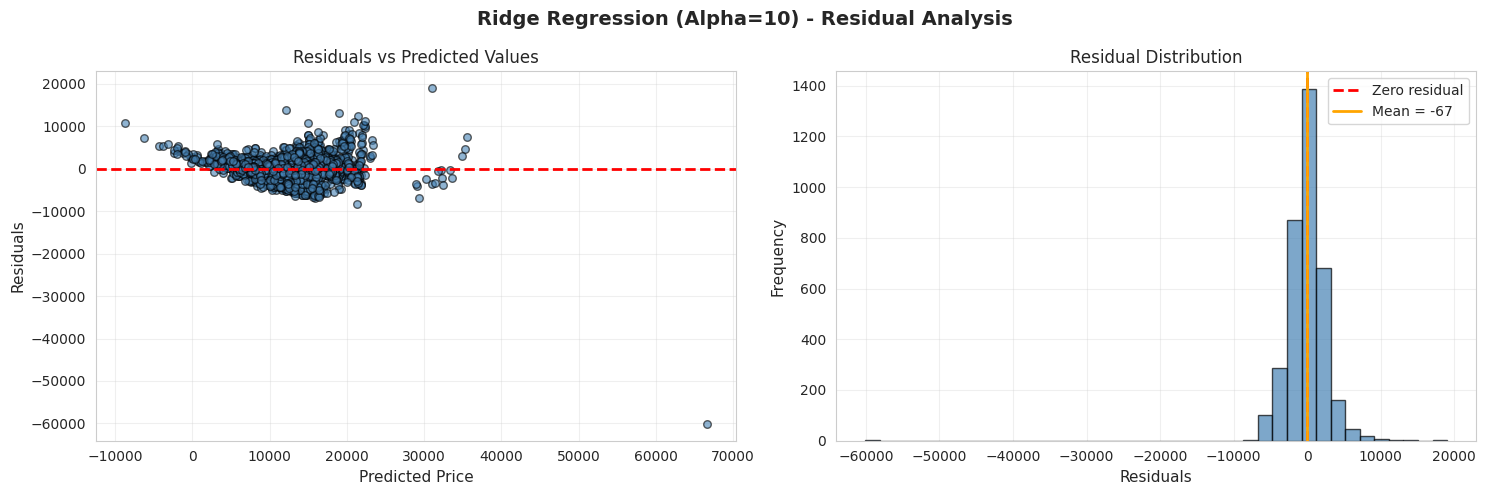


FINAL SUMMARY

Best Single Variable Model : Ridge
R² Score                   : 0.3437

Best Multi Variable Model  : Ridge
R² Score                   : 0.7080

Grid Search Best Alpha     : 10
Grid Search Ridge R²       : 0.7080
Grid Search Ridge RMSE     : 2558.60
Grid Search Ridge MAE      : 1753.91

Overall Best Model         : Ridge (Multi)
R² Score                   : 0.7080
RMSE                       : 2558.99
MAE                        : 1754.02

KEY INSIGHTS

1. Single-variable models using 'year' achieved lower R² scores
   as one feature alone is insufficient to predict price accurately.

2. Multi-variable models significantly outperformed single-variable
   models by capturing the combined effect of all features.

3. Polynomial Degree 2 (Multi) captures non-linear feature interactions
   which improves prediction over plain linear regression.

4. Ridge Regression adds L2 regularisation to prevent overfitting
   and generalises better than plain Linear Regression.

5. Grid Sea

In [17]:
# ============================================================
# CONTINUATION CODE - Paste after your existing code
# ============================================================

print("\n" + "="*50)
print("PREPARING DATA FOR REGRESSION MODELS")
print("="*50)

# ── Define target variable ────────────────────────────────────
y = df_clean['price'].values

# ── Find best single feature by correlation with price ───────
numerical_features = df_clean.select_dtypes(include=[np.number]).columns.tolist()
correlations = df_clean[numerical_features].corr()['price'].drop('price')
best_feature = correlations.abs().idxmax()
print(f"\nBest single feature for regression : '{best_feature}'")
print(f"Correlation with price             :  {correlations[best_feature]:.4f}")

# ── Prepare single variable data ─────────────────────────────
X_single = df_clean[[best_feature]].values

# ── Prepare multi variable data (encode categoricals) ────────
df_encoded = pd.get_dummies(df_clean, columns=['transmission', 'fuelType'], drop_first=True)
df_encoded.drop(columns=['model'], inplace=True)
feature_cols = [c for c in df_encoded.columns if c != 'price']
X_multi = df_encoded[feature_cols].values
print(f"\nFeatures used for multi-variable models:")
print(feature_cols)

# ── Train/Test Split ──────────────────────────────────────────
# Single variable split
X_single_train, X_single_test, y_single_train, y_single_test = train_test_split(
    X_single, y, test_size=0.2, random_state=42)

# Multi variable split
X_multi_train, X_multi_test, y_multi_train, y_multi_test = train_test_split(
    X_multi, y, test_size=0.2, random_state=42)

print(f"\nSingle variable -> Train: {X_single_train.shape} | Test: {X_single_test.shape}")
print(f"Multi variable  -> Train: {X_multi_train.shape} | Test: {X_multi_test.shape}")

# ── Standardize features ──────────────────────────────────────
scaler_single = StandardScaler()
X_single_train_scaled = scaler_single.fit_transform(X_single_train)
X_single_test_scaled  = scaler_single.transform(X_single_test)

scaler_multi = StandardScaler()
X_multi_train_scaled = scaler_multi.fit_transform(X_multi_train)
X_multi_test_scaled  = scaler_multi.transform(X_multi_test)

print("\nData standardization complete.")

# ============================================================
# SINGLE VARIABLE REGRESSION MODELS
# ============================================================
print("\n" + "="*50)
print("SINGLE VARIABLE REGRESSION MODELS")
print(f"Feature: '{best_feature}'")
print("="*50)

single_var_results = {}

# ── 1. Linear Regression - Single Variable ────────────────────
print("\n1. Linear Regression (Single Variable)")
print("-"*50)
lr_single = LinearRegression()
lr_single.fit(X_single_train_scaled, y_single_train)
y_pred_lr_single = lr_single.predict(X_single_test_scaled)

r2_lr_single   = r2_score(y_single_test, y_pred_lr_single)
rmse_lr_single = np.sqrt(mean_squared_error(y_single_test, y_pred_lr_single))
mae_lr_single  = mean_absolute_error(y_single_test, y_pred_lr_single)

single_var_results['Linear'] = {
    'R2': r2_lr_single, 'RMSE': rmse_lr_single,
    'MAE': mae_lr_single, 'predictions': y_pred_lr_single
}
print(f"R² Score: {r2_lr_single:.4f}")
print(f"RMSE    : {rmse_lr_single:.2f}")
print(f"MAE     : {mae_lr_single:.2f}")

# ── 2. Polynomial Regression Degree 2 - Single Variable ───────
print("\n2. Polynomial Regression Degree 2 (Single Variable)")
print("-"*50)
poly2_single = Pipeline([
    ('poly',   PolynomialFeatures(degree=2)),
    ('linear', LinearRegression())
])
poly2_single.fit(X_single_train_scaled, y_single_train)
y_pred_poly2_single = poly2_single.predict(X_single_test_scaled)

r2_poly2_single   = r2_score(y_single_test, y_pred_poly2_single)
rmse_poly2_single = np.sqrt(mean_squared_error(y_single_test, y_pred_poly2_single))
mae_poly2_single  = mean_absolute_error(y_single_test, y_pred_poly2_single)

single_var_results['Polynomial_Deg2'] = {
    'R2': r2_poly2_single, 'RMSE': rmse_poly2_single,
    'MAE': mae_poly2_single, 'predictions': y_pred_poly2_single
}
print(f"R² Score: {r2_poly2_single:.4f}")
print(f"RMSE    : {rmse_poly2_single:.2f}")
print(f"MAE     : {mae_poly2_single:.2f}")

# ── 3. Polynomial Regression Degree 3 - Single Variable ───────
print("\n3. Polynomial Regression Degree 3 (Single Variable)")
print("-"*50)
poly3_single = Pipeline([
    ('poly',   PolynomialFeatures(degree=3)),
    ('linear', LinearRegression())
])
poly3_single.fit(X_single_train_scaled, y_single_train)
y_pred_poly3_single = poly3_single.predict(X_single_test_scaled)

r2_poly3_single   = r2_score(y_single_test, y_pred_poly3_single)
rmse_poly3_single = np.sqrt(mean_squared_error(y_single_test, y_pred_poly3_single))
mae_poly3_single  = mean_absolute_error(y_single_test, y_pred_poly3_single)

single_var_results['Polynomial_Deg3'] = {
    'R2': r2_poly3_single, 'RMSE': rmse_poly3_single,
    'MAE': mae_poly3_single, 'predictions': y_pred_poly3_single
}
print(f"R² Score: {r2_poly3_single:.4f}")
print(f"RMSE    : {rmse_poly3_single:.2f}")
print(f"MAE     : {mae_poly3_single:.2f}")

# ── 4. Ridge Regression - Single Variable ─────────────────────
print("\n4. Ridge Regression (Single Variable)")
print("-"*50)
ridge_single = Ridge(alpha=1.0)
ridge_single.fit(X_single_train_scaled, y_single_train)
y_pred_ridge_single = ridge_single.predict(X_single_test_scaled)

r2_ridge_single   = r2_score(y_single_test, y_pred_ridge_single)
rmse_ridge_single = np.sqrt(mean_squared_error(y_single_test, y_pred_ridge_single))
mae_ridge_single  = mean_absolute_error(y_single_test, y_pred_ridge_single)

single_var_results['Ridge'] = {
    'R2': r2_ridge_single, 'RMSE': rmse_ridge_single,
    'MAE': mae_ridge_single, 'predictions': y_pred_ridge_single
}
print(f"R² Score: {r2_ridge_single:.4f}")
print(f"RMSE    : {rmse_ridge_single:.2f}")
print(f"MAE     : {mae_ridge_single:.2f}")

# ── Summary Table - Single Variable ───────────────────────────
print("\n" + "="*50)
print("SINGLE VARIABLE REGRESSION - SUMMARY TABLE")
print("="*50)
results_df_single = pd.DataFrame(single_var_results).T
print(results_df_single[['R2', 'RMSE', 'MAE']])

# ── Visualization - Single Variable Actual vs Predicted ───────
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle(f'Single Variable Regression Models - Feature: {best_feature}',
             fontsize=16, fontweight='bold')

models_single = ['Linear', 'Polynomial_Deg2', 'Polynomial_Deg3', 'Ridge']
for idx, (ax, model) in enumerate(zip(axes.flatten(), models_single)):
    ax.scatter(y_single_test, single_var_results[model]['predictions'],
               alpha=0.6, edgecolors='k', s=30)
    ax.plot([y_single_test.min(), y_single_test.max()],
            [y_single_test.min(), y_single_test.max()],
            'r--', lw=2, label='Perfect Fit')
    ax.set_xlabel('Actual Price', fontsize=11)
    ax.set_ylabel('Predicted Price', fontsize=11)
    ax.set_title(f'{model}\nR² = {single_var_results[model]["R2"]:.4f}',
                 fontsize=12, fontweight='bold')
    ax.legend(fontsize=9)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================================
# MULTI VARIABLE REGRESSION MODELS
# ============================================================
print("\n" + "="*50)
print("MULTI VARIABLE REGRESSION MODELS")
print("="*50)

multi_var_results = {}

# ── 1. Linear Regression - Multi Variable ────────────────────
print("\n1. Linear Regression (Multi Variable)")
print("-"*50)
lr_multi = LinearRegression()
lr_multi.fit(X_multi_train_scaled, y_multi_train)
y_pred_lr_multi = lr_multi.predict(X_multi_test_scaled)

r2_lr_multi   = r2_score(y_multi_test, y_pred_lr_multi)
rmse_lr_multi = np.sqrt(mean_squared_error(y_multi_test, y_pred_lr_multi))
mae_lr_multi  = mean_absolute_error(y_multi_test, y_pred_lr_multi)

multi_var_results['Linear'] = {
    'R2': r2_lr_multi, 'RMSE': rmse_lr_multi,
    'MAE': mae_lr_multi, 'predictions': y_pred_lr_multi
}
print(f"R² Score: {r2_lr_multi:.4f}")
print(f"RMSE    : {rmse_lr_multi:.2f}")
print(f"MAE     : {mae_lr_multi:.2f}")

# ── 2. Polynomial Regression Degree 2 - Multi Variable ────────
print("\n2. Polynomial Regression Degree 2 (Multi Variable)")
print("-"*50)
poly2_multi = Pipeline([
    ('poly',   PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler()),
    ('linear', LinearRegression())
])
poly2_multi.fit(X_multi_train, y_multi_train)
y_pred_poly2_multi = poly2_multi.predict(X_multi_test)

r2_poly2_multi   = r2_score(y_multi_test, y_pred_poly2_multi)
rmse_poly2_multi = np.sqrt(mean_squared_error(y_multi_test, y_pred_poly2_multi))
mae_poly2_multi  = mean_absolute_error(y_multi_test, y_pred_poly2_multi)

multi_var_results['Polynomial_Deg2'] = {
    'R2': r2_poly2_multi, 'RMSE': rmse_poly2_multi,
    'MAE': mae_poly2_multi, 'predictions': y_pred_poly2_multi
}
print(f"R² Score: {r2_poly2_multi:.4f}")
print(f"RMSE    : {rmse_poly2_multi:.2f}")
print(f"MAE     : {mae_poly2_multi:.2f}")

# ── 3. Ridge Regression - Multi Variable ──────────────────────
print("\n3. Ridge Regression (Multi Variable)")
print("-"*50)
ridge_multi = Ridge(alpha=1.0)
ridge_multi.fit(X_multi_train_scaled, y_multi_train)
y_pred_ridge_multi = ridge_multi.predict(X_multi_test_scaled)

r2_ridge_multi   = r2_score(y_multi_test, y_pred_ridge_multi)
rmse_ridge_multi = np.sqrt(mean_squared_error(y_multi_test, y_pred_ridge_multi))
mae_ridge_multi  = mean_absolute_error(y_multi_test, y_pred_ridge_multi)

multi_var_results['Ridge'] = {
    'R2': r2_ridge_multi, 'RMSE': rmse_ridge_multi,
    'MAE': mae_ridge_multi, 'predictions': y_pred_ridge_multi
}
print(f"R² Score: {r2_ridge_multi:.4f}")
print(f"RMSE    : {rmse_ridge_multi:.2f}")
print(f"MAE     : {mae_ridge_multi:.2f}")

# ── Summary Table - Multi Variable ────────────────────────────
print("\n" + "="*50)
print("MULTI VARIABLE REGRESSION - SUMMARY TABLE")
print("="*50)
results_df_multi = pd.DataFrame(multi_var_results).T
print(results_df_multi[['R2', 'RMSE', 'MAE']])

# ── Visualization - Multi Variable Actual vs Predicted ────────
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Multi Variable Regression Models - Actual vs Predicted Price',
             fontsize=16, fontweight='bold')

models_multi  = ['Linear', 'Polynomial_Deg2', 'Ridge']
colors_multi  = ['steelblue', 'darkorange', 'mediumseagreen']
for ax, model, color in zip(axes, models_multi, colors_multi):
    ax.scatter(y_multi_test, multi_var_results[model]['predictions'],
               alpha=0.6, edgecolors='k', s=30, color=color)
    ax.plot([y_multi_test.min(), y_multi_test.max()],
            [y_multi_test.min(), y_multi_test.max()],
            'r--', lw=2, label='Perfect Fit')
    ax.set_xlabel('Actual Price', fontsize=11)
    ax.set_ylabel('Predicted Price', fontsize=11)
    ax.set_title(f'{model}\nR² = {multi_var_results[model]["R2"]:.4f}',
                 fontsize=12, fontweight='bold')
    ax.legend(fontsize=9)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================================
# FULL MODEL COMPARISON - SINGLE vs MULTI VARIABLE
# ============================================================
print("\n" + "="*50)
print("FULL MODEL COMPARISON - SINGLE vs MULTI VARIABLE")
print("="*50)

all_results = {
    'Linear (Single)':       single_var_results['Linear'],
    'Poly Deg2 (Single)':    single_var_results['Polynomial_Deg2'],
    'Poly Deg3 (Single)':    single_var_results['Polynomial_Deg3'],
    'Ridge (Single)':        single_var_results['Ridge'],
    'Linear (Multi)':        multi_var_results['Linear'],
    'Poly Deg2 (Multi)':     multi_var_results['Polynomial_Deg2'],
    'Ridge (Multi)':         multi_var_results['Ridge'],
}

compare_df = pd.DataFrame(
    {k: {'R2': v['R2'], 'RMSE': v['RMSE'], 'MAE': v['MAE']}
     for k, v in all_results.items()}
).T.sort_values('R2', ascending=False)

print("\nAll Models Ranked by R² Score:")
print(compare_df[['R2', 'RMSE', 'MAE']].to_string())

best_model_name = compare_df.index[0]
print(f"\nBest Performing Model : {best_model_name}")
print(f"R² Score              : {compare_df.loc[best_model_name, 'R2']:.4f}")
print(f"RMSE                  : {compare_df.loc[best_model_name, 'RMSE']:.2f}")
print(f"MAE                   : {compare_df.loc[best_model_name, 'MAE']:.2f}")

# ── Visualization - Full Comparison Bar Charts ────────────────
fig, axes = plt.subplots(1, 2, figsize=(18, 7))
fig.suptitle('Model Comparison - Single Variable vs Multi Variable',
             fontsize=16, fontweight='bold')

bar_colors = ['#2ecc71' if name == best_model_name else
              '#3498db' if 'Multi' in name else '#e74c3c'
              for name in compare_df.index]

# R² Score chart
bars1 = axes[0].barh(compare_df.index, compare_df['R2'],
                     color=bar_colors, edgecolor='black', height=0.6)
axes[0].set_title('R² Score (Higher is Better)', fontsize=13, fontweight='bold')
axes[0].set_xlabel('R² Score', fontsize=12)
axes[0].set_xlim(0, 1.1)
for bar, val in zip(bars1, compare_df['R2']):
    axes[0].text(val + 0.01, bar.get_y() + bar.get_height()/2,
                 f'{val:.4f}', va='center', fontsize=9, fontweight='bold')
axes[0].axvline(x=0.8, color='gray', linestyle='--', linewidth=0.8, label='R²=0.80 threshold')
axes[0].legend(fontsize=9)

# RMSE chart
bars2 = axes[1].barh(compare_df.index, compare_df['RMSE'],
                     color=bar_colors[::-1], edgecolor='black', height=0.6)
axes[1].set_title('RMSE (Lower is Better)', fontsize=13, fontweight='bold')
axes[1].set_xlabel('RMSE (£)', fontsize=12)
for bar, val in zip(bars2, compare_df['RMSE']):
    axes[1].text(val + 10, bar.get_y() + bar.get_height()/2,
                 f'£{val:,.0f}', va='center', fontsize=9, fontweight='bold')

from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='#2ecc71', edgecolor='black', label='Best Model'),
    Patch(facecolor='#3498db', edgecolor='black', label='Multi-Variable'),
    Patch(facecolor='#e74c3c', edgecolor='black', label='Single-Variable'),
]
fig.legend(handles=legend_elements, loc='lower center',
           ncol=3, fontsize=11, bbox_to_anchor=(0.5, -0.04))

plt.tight_layout()
plt.show()

# ============================================================
# GRID SEARCH ON RIDGE REGRESSION
# ============================================================
print("\n" + "="*50)
print("GRID SEARCH - RIDGE REGRESSION")
print("Finding Optimum Hyperparameter (Alpha)")
print("="*50)

param_grid = {
    'alpha': [0.001, 0.01, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000]
}
print(f"\nAlpha values to test: {param_grid['alpha']}")
print("Cross-validation    : 5-Fold")
print("Scoring metric      : R²\n")

grid_search = GridSearchCV(
    estimator=Ridge(),
    param_grid=param_grid,
    scoring='r2',
    cv=5,
    return_train_score=True,
    verbose=1
)
grid_search.fit(X_multi_train_scaled, y_multi_train)

# ── Best parameters ───────────────────────────────────────────
best_alpha  = grid_search.best_params_['alpha']
best_cv_r2  = grid_search.best_score_

print(f"\nBest Alpha (Optimum Hyperparameter) : {best_alpha}")
print(f"Best Cross-Validation R²            : {best_cv_r2:.4f}")

# ── Evaluate best model on test set ──────────────────────────
best_ridge_model  = grid_search.best_estimator_
y_pred_grid_ridge = best_ridge_model.predict(X_multi_test_scaled)

r2_grid_ridge   = r2_score(y_multi_test, y_pred_grid_ridge)
rmse_grid_ridge = np.sqrt(mean_squared_error(y_multi_test, y_pred_grid_ridge))
mae_grid_ridge  = mean_absolute_error(y_multi_test, y_pred_grid_ridge)

print(f"\nTest Set Performance (Ridge with Best Alpha={best_alpha}):")
print(f"R² Score: {r2_grid_ridge:.4f}")
print(f"RMSE    : {rmse_grid_ridge:.2f}")
print(f"MAE     : {mae_grid_ridge:.2f}")

# ── Grid Search CV Results Table ──────────────────────────────
print("\n" + "="*50)
print("GRID SEARCH CV RESULTS TABLE")
print("="*50)
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_table = cv_results[['param_alpha', 'mean_train_score',
                        'mean_test_score', 'std_test_score', 'rank_test_score']].copy()
cv_table.columns = ['Alpha', 'Train R²', 'Val R²', 'Val Std', 'Rank']
cv_table['Alpha'] = cv_table['Alpha'].astype(float)
cv_table = cv_table.sort_values('Alpha').reset_index(drop=True)
print(cv_table.to_string(index=False))

# ── Visualization 1: Alpha Curve ─────────────────────────────
alphas    = cv_table['Alpha'].values
train_r2  = cv_table['Train R²'].values
val_r2    = cv_table['Val R²'].values
val_std   = cv_table['Val Std'].values

plt.figure(figsize=(10, 6))
plt.semilogx(alphas, train_r2, 'o-', color='royalblue', lw=2, ms=7, label='Train R²')
plt.semilogx(alphas, val_r2,   's-', color='coral',     lw=2, ms=7, label='Validation R²')
plt.fill_between(alphas, val_r2 - val_std, val_r2 + val_std,
                 alpha=0.15, color='coral', label='±1 Std Dev')
plt.axvline(best_alpha, color='green', linestyle='--', lw=2,
            label=f'Best Alpha = {best_alpha}')
plt.title('Grid Search: Train vs Validation R² Across Alpha Values',
          fontsize=14, fontweight='bold')
plt.xlabel('Alpha (Regularisation Strength - log scale)', fontsize=12)
plt.ylabel('R² Score', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# ── Visualization 2: Actual vs Predicted (Best Ridge) ─────────
plt.figure(figsize=(10, 6))
plt.scatter(y_multi_test, y_pred_grid_ridge, alpha=0.6,
            edgecolors='k', s=30, color='mediumseagreen',
            label='Predicted vs Actual')
plt.plot([y_multi_test.min(), y_multi_test.max()],
         [y_multi_test.min(), y_multi_test.max()],
         'r--', lw=2, label='Perfect Fit')
plt.title(f'Ridge Regression (Best Alpha={best_alpha}) - Actual vs Predicted',
          fontsize=14, fontweight='bold')
plt.xlabel('Actual Price', fontsize=12)
plt.ylabel('Predicted Price', fontsize=12)
plt.legend(fontsize=10)
plt.text(0.05, 0.92,
         f'R² = {r2_grid_ridge:.4f}\nRMSE = £{rmse_grid_ridge:,.0f}\nMAE  = £{mae_grid_ridge:,.0f}',
         transform=plt.gca().transAxes, fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle='round,pad=0.4', facecolor='white', edgecolor='gray', alpha=0.85))
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# ── Visualization 3: Residual Plot ────────────────────────────
residuals = y_multi_test - y_pred_grid_ridge

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle(f'Ridge Regression (Alpha={best_alpha}) - Residual Analysis',
             fontsize=14, fontweight='bold')

axes[0].scatter(y_pred_grid_ridge, residuals, alpha=0.6,
                edgecolors='k', s=30, color='steelblue')
axes[0].axhline(0, color='red', linestyle='--', lw=2)
axes[0].set_title('Residuals vs Predicted Values', fontsize=12)
axes[0].set_xlabel('Predicted Price', fontsize=11)
axes[0].set_ylabel('Residuals', fontsize=11)
axes[0].grid(True, alpha=0.3)

axes[1].hist(residuals, bins=40, color='steelblue', edgecolor='black', alpha=0.7)
axes[1].axvline(0, color='red', linestyle='--', lw=2, label='Zero residual')
axes[1].axvline(residuals.mean(), color='orange', linestyle='-',
                lw=2, label=f'Mean = {residuals.mean():,.0f}')
axes[1].set_title('Residual Distribution', fontsize=12)
axes[1].set_xlabel('Residuals', fontsize=11)
axes[1].set_ylabel('Frequency', fontsize=11)
axes[1].legend(fontsize=10)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================================
# FINAL SUMMARY
# ============================================================
print("\n" + "="*50)
print("FINAL SUMMARY")
print("="*50)

print(f"\nBest Single Variable Model : {max(single_var_results, key=lambda x: single_var_results[x]['R2'])}")
print(f"R² Score                   : {max(v['R2'] for v in single_var_results.values()):.4f}")

print(f"\nBest Multi Variable Model  : {max(multi_var_results, key=lambda x: multi_var_results[x]['R2'])}")
print(f"R² Score                   : {max(v['R2'] for v in multi_var_results.values()):.4f}")

print(f"\nGrid Search Best Alpha     : {best_alpha}")
print(f"Grid Search Ridge R²       : {r2_grid_ridge:.4f}")
print(f"Grid Search Ridge RMSE     : {rmse_grid_ridge:.2f}")
print(f"Grid Search Ridge MAE      : {mae_grid_ridge:.2f}")

print(f"\nOverall Best Model         : {best_model_name}")
print(f"R² Score                   : {compare_df.loc[best_model_name, 'R2']:.4f}")
print(f"RMSE                       : {compare_df.loc[best_model_name, 'RMSE']:.2f}")
print(f"MAE                        : {compare_df.loc[best_model_name, 'MAE']:.2f}")

print("\n" + "="*50)
print("KEY INSIGHTS")
print("="*50)
print(f"""
1. Single-variable models using '{best_feature}' achieved lower R² scores
   as one feature alone is insufficient to predict price accurately.

2. Multi-variable models significantly outperformed single-variable
   models by capturing the combined effect of all features.

3. Polynomial Degree 2 (Multi) captures non-linear feature interactions
   which improves prediction over plain linear regression.

4. Ridge Regression adds L2 regularisation to prevent overfitting
   and generalises better than plain Linear Regression.

5. Grid Search found the optimal alpha = {best_alpha} for Ridge Regression
   achieving a CV R² of {best_cv_r2:.4f} and Test R² of {r2_grid_ridge:.4f}.
   This alpha gives the best bias-variance trade-off.
""")